Looping Graph

Objectives:

1. Implement looping logic to route the flow of data back to the nodes
2. Create a single conditional edge to handle decision-making and
control graph flow.

Main Goal: Coding up Looping Logic

In [1]:
from langgraph.graph import StateGraph,END
import random
from typing import Dict,List,TypedDict

In [2]:
class AgentState(TypedDict):
    name:str
    number:List[int]
    counter:int 

In [ ]:
# def greeting_node(state:AgentState) -> AgentState:
#     """This node greets the user"""
   
#     state["name"]=f"Hello, {state['name']}"
#     state ["counter"]=0
#     return state

# def random_node(state:AgentState)->AgentState:
#     """Generates a random number between 0 and 10 and appends it to the list"""
#     state["number"].append(random.randint(0,10))
#     state["counter"]+=1
#     return state

# def should_continue(state:AgentState) -> str:
#     """Decides whether to continue or end the loop based on the counter.
#     The function must return one of the keys used in add_conditional_edges mapping:
#     'loop' to continue, 'exit' to end.
#     """
#     if state["counter"] < 5:
#         return "loop"  # continue looping (matches mapping key)
#     else:
#         return "exit"  # exit loop (matches mapping key)

In [20]:
def greeting_node(state:AgentState) -> AgentState:
    """This node greets the user"""
   
    state["name"]=f"Hello, {state['name']}"
    state ["counter"]=0
    return state

def random_node(state:AgentState)->AgentState:
    """Generates a random number between 0 and 10 and appends it to the list"""
    state["number"].append(random.randint(0,10))
    state["counter"]+=1
    return state

def should_continue(state:AgentState) -> AgentState:
    """Decides whether to continue or end the loop based on the counter"""
    if state["counter"]<5:
        return "loop" #continue looping 
    else:
        return "exit"  #Exit loop

#Greeting -> random -> random -> random -> random -> random -> END 

In [22]:
graph=StateGraph(AgentState)

graph.add_node("greeting_node",greeting_node)
graph.add_node("random",random_node)
graph.add_edge("greeting_node","random")


graph.add_conditional_edges(
    "random",# source Node 
    should_continue, #Action
    {
        "loop":"random", #Self-loop back to same node 
        "exit":END  #END the graph
    }
)

graph.set_entry_point("greeting_node")

app=graph.compile()

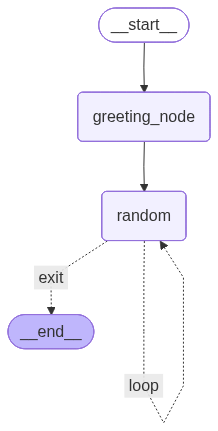

In [18]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
app.invoke({"name":"Hemu","number":[],"counter":-1})


{'name': 'Hello, Hemu', 'number': [4, 3, 10, 8, 9], 'counter': 5}